# Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings

# Kaggle Setup

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# Load and Know Your Data

In [3]:
path_train= "/kaggle/input/home-data-for-ml-course/train.csv"
path_test= "/kaggle/input/home-data-for-ml-course/test.csv"
test= pd.read_csv(path_test)
df= pd.read_csv(path_train)
print("shape test: ",test.shape)
print("shape train:", df.shape)

shape test:  (1459, 80)
shape train: (1460, 81)


In [4]:
print("----------  TEST ----------")
print(test.head())

----------  TEST ----------
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   

In [5]:
print("----------  TRAIN ----------")
print(df.head())

----------  TRAIN ----------
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     

In [6]:
print("Test columns:\n", list(test.columns))

Test columns:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [7]:
print("Train columns:\n", list(df.columns))

Train columns:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Poo

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Exploratory Data Analysis

In [10]:
print("Average null values in each column:")
print(df.isna().mean()*100)

Average null values in each column:
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2

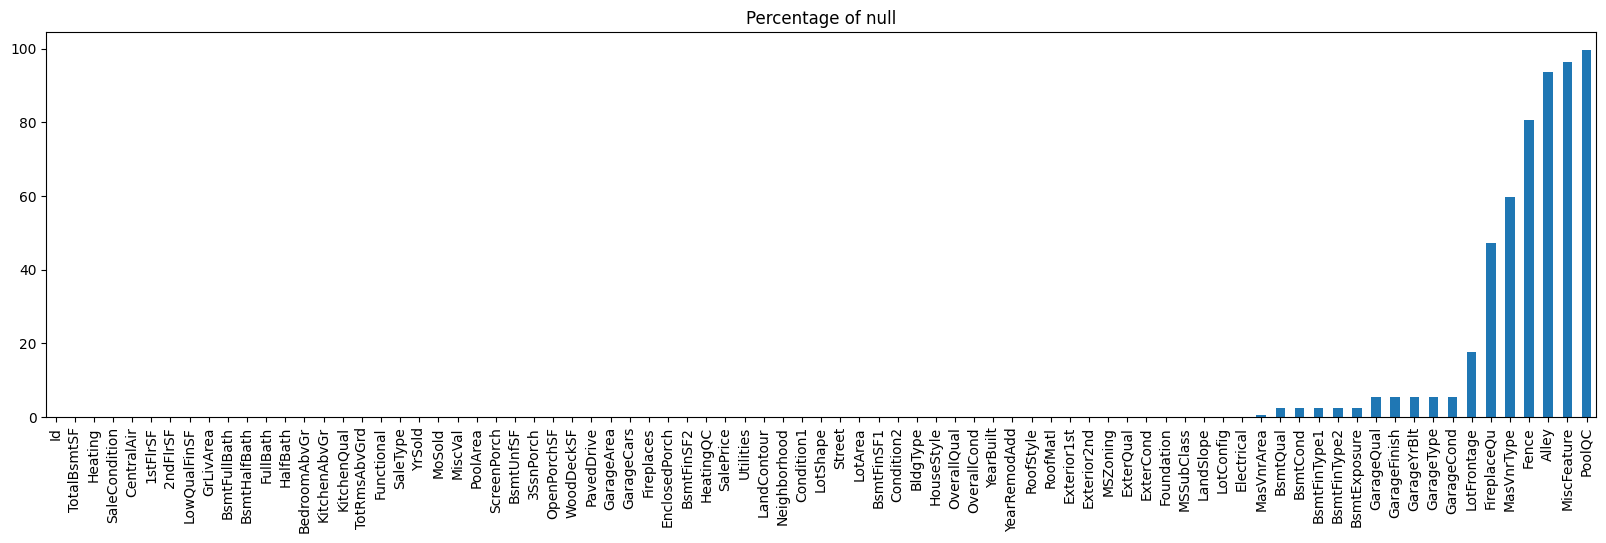

In [11]:
plt.rcParams["figure.figsize"]= (20,5)
plt.title("Percentage of null")
(df.isna().mean()*100).sort_values().plot.bar()
plt.show()

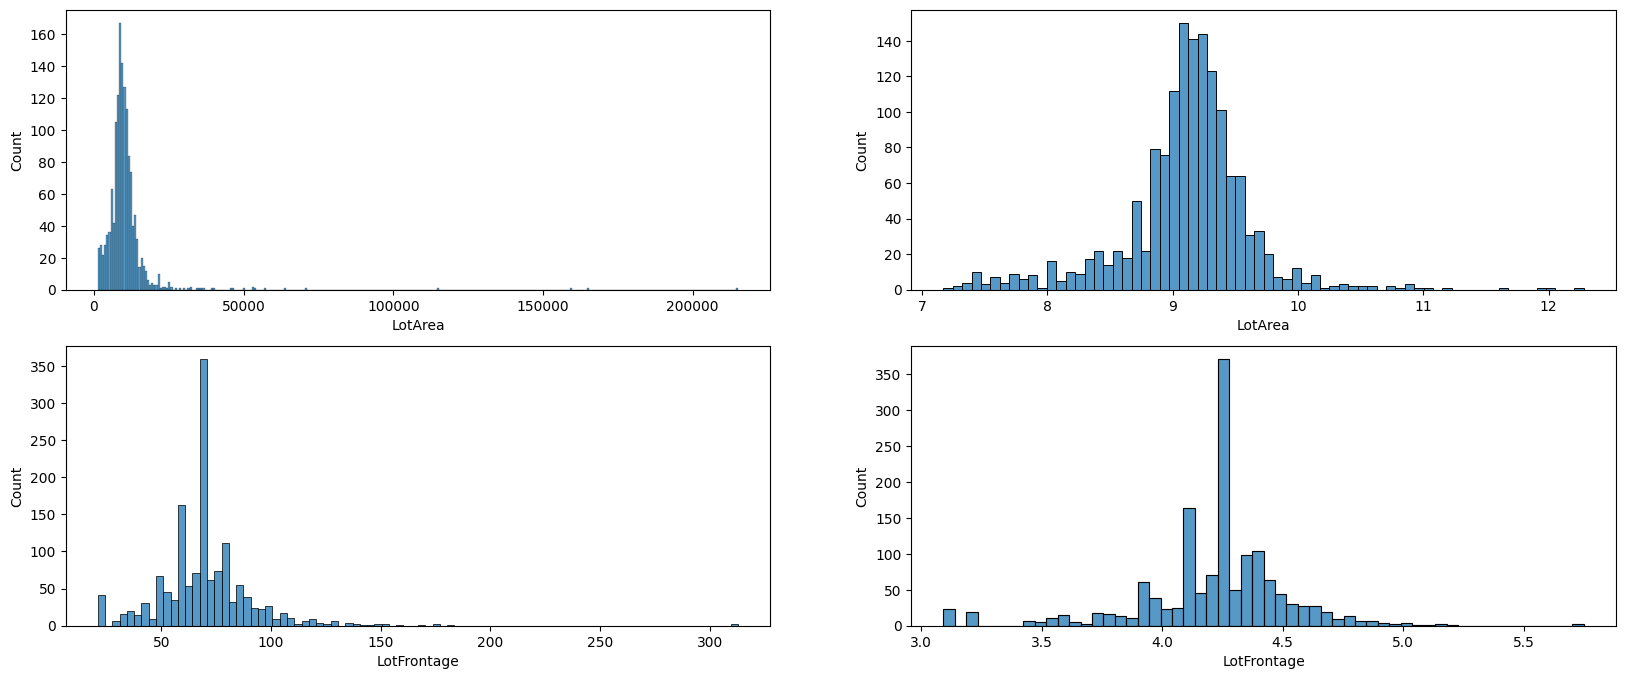

In [12]:
df_lot= df[["LotArea", "LotFrontage", "LotShape", "LotConfig"]]

plt.rcParams["figure.figsize"] = (20, 8)
fix, ax= plt.subplots(nrows=2, ncols=2)
lot= "LotArea"
sns.histplot(df_lot[lot].fillna(df_lot[lot].median()), ax=ax[0][0])
sns.histplot(np.log1p(df_lot[lot].fillna(df_lot[lot].median())), ax= ax[0][1])

lot= "LotFrontage"
sns.histplot(df_lot[lot].fillna(df_lot[lot].median()), ax=ax[1][0])
sns.histplot(np.log1p(df_lot[lot].fillna(df_lot[lot].median())), ax= ax[1][1])
plt.show()

In [13]:
categorical_columns= df.describe(exclude="number").columns
binary = [col for col in categorical_columns if df[col].nunique() == 2]
ordinal = [col for col in categorical_columns if 'Qual' in col or 'Cond' in col]
nominal = [col for col in categorical_columns if col not in binary + ordinal] # Name, gender, city, state etc

numerical_columns= df.describe(include="number").columns
continous= [col for col in numerical_columns if df[col].nunique()>20]
descrete= [col for col in numerical_columns if df[col].nunique()<=20]
# Temporal features are any columns in your dataset that represent time — either directly or indirectly.
temporal = [col for col in numerical_columns if 'Year' in col or 'Yr' in col] # Time, date, year, duration

In [14]:
df_continous= df[continous]
df_continous.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,250000


In [15]:
gjhg

NameError: name 'gjhg' is not defined

# Feature Engineering

In [ ]:
class HousePriceFeatureEngineering:
    def __init__(self):
        pass

    def __handle_null(
        self,
        df: pd.DataFrame
        ):
        if not df.empty:
            # Drop columns with higher nulls
            threshold= 0.29
            null_ratio= df.isna().mean() # Calculate null fraction per column
            col_to_drop= null_ratio[null_ratio>threshold].index
            df.drop(col_to_drop, axis=1, inplace=True)
            print(f"Dropped columns: {list(col_to_drop)}")
            numerical_cols= df.describe(include="number").columns
            categoric_cols= df.describe(include="object").columns
            # Null handling in numerical cols
            for col in numerical_cols:
                df[col]= df[col].fillna(df[col].median())
            # Null handling in categorical cols
            for col in categoric_cols:
                top= df[col].describe().top
                df[col]= df[col].fillna(top)
        else:
            print("Got an empty dataframe!")
        return df


    def __encode_categorical_features(self, df: pd.DataFrame, encoder=None, fit= True):
        if not df.empty:
            features= df.describe(include="object").columns
            additional_features= ["MSSubClass"]
            features.extend(additional_features)
            if fit:
                print("fit encoder is true!")
                encoder= OneHotEncoder(handle_unknown="ignore", sparse_output=False)
                encoder.fit(df[features])
            else:
                print("fit encoder is false")
            if encoder:
                encoded_array= encoder.transform(df[features])
                df= pd.concat([
                    df.drop(features, axis=1),
                    pd.DataFrame(data=encoded_array, columns= encoder.get_feature_names_out(features), index= df.index)
                ], axis=1)
                print("Data successfully encoded!")
            return df, encoder

    def __scaling(self, df:pd.DataFrame, scaler_x=None, scaler_y=None, fit=True):
        feature_to_scale=[]
        if not df.empty:
            col_exclude= ["Id", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold", "SalePrice", "MSSubClass",
                         "OverallQual", "OverallCond", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
                          "BedroomAbvGr", "KitchenAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "FirePlaces", "GarageCars",
                          "3SsnPorch", "PoolArea", "MiscVal", "MoSold"]
            numeric_cols= df.describe(include="number")
            features= [col for col in numeric_cols if col not in col_exclude]
            if fit:
                print("fit scaler is true!")
                scaler_x= StandardScaler()
                scaler_y= StandardScaler()
                scaler_x.fit(df[features])
                scaler_y.fit(df[["SalePrice"]])
                df["SalePrice"]= scaler_y.transform(df[["SalePrice"]])
            else:
                print("fit scaler is false!")

            df[features]= scaler_x.transform(df[features])
            print("Data successfully scaled!")
            return df, scaler_x, scaler_y

    def data_preprocessing(self, df:pd.DataFrame, encoder=None, scaler_x=None, scaler_y=None, fit=True):
        df= self.__handle_null(df)
        df, encoder= self.__encode_categorical_features(df=df, fit=fit)
        df, scaler_x, scaler_y= self.__scaling(df=df, scaler_x=scaler_x, scaler_y=scaler_y, fit=fit)
        return df, encoder, scaler_x, scaler_y

In [ ]:
hp_feature_eng= HousePriceFeatureEngineering()
df_processed,encoder,scaler_x,scaler_y= hp_feature_eng.data_preprocessing(df.copy(), fit=True)
# x= hp_feature_eng._handle_null(df.copy())
# print(x.shape)
# x, encoder= hp_feature_eng._encode_categorical_features(x.copy())
# x, scaler_x, scaler_y= hp_feature_eng._scaling(x)
X= df_processed.drop(["SalePrice"], axis=1)
y= df_processed["SalePrice"]

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=12345, test_size=0.2)

In [ ]:
X_train.head()

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score
pred= lr.predict(X_train)
r2_score(y_train, pred)

In [ ]:
pred= lr.predict(X_test)
r2_score(y_test, pred)